In [22]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import os
from scipy import signal

In [23]:
# Expect the sampling rate to be the same for all recordings.
sampling_rate_expected = 44100

# The window size for the spectrogram.
window_size = 512

# The window overlap for the spectrogram.
window_overlap = 0

In [24]:
# The directory where the .wav files are located. We will read these.
recording_dir = '../../Recordings/'

# The directory where we will write the computed spectrograms as .png image files.
spectrogram_dir = '../../Spectrograms/'

In [25]:
# Write spectrogram parameters.
parameters_filename = spectrogram_dir + '0_spectrogram_parameters.txt'
spectogram_param_file = open(parameters_filename,'w')
spectogram_param_file.write('sampling rate = '+ repr(sampling_rate_expected)+'\n')
spectogram_param_file.write('window size = '+ repr(window_size)+'\n')
spectogram_param_file.write('window overlap = '+ repr(window_overlap)+'\n')
spectogram_param_file.write('log10 of spectrum\n')
spectogram_param_file.close()

In [26]:
# Get list of recordings.
recording_list = os.listdir(recording_dir);
n_recordings = len(recording_list)
print(n_recordings)

171


recording 1 of 171: about to read 00037.wav
recording 2 of 171: about to read 00029.wav
recording 3 of 171: about to read 00120.wav
recording 4 of 171: about to read 00166.wav
recording 5 of 171: about to read 00056.wav
recording 6 of 171: about to read 00092.wav
recording 7 of 171: about to read 00113.wav
recording 8 of 171: about to read 00146.wav
recording 9 of 171: about to read 00094.wav
recording 10 of 171: about to read 00159.wav
recording 11 of 171: about to read 00045.wav
recording 12 of 171: about to read 00134.wav
recording 13 of 171: about to read 00114.wav
recording 14 of 171: about to read 00017.wav
recording 15 of 171: about to read 00098.wav
recording 16 of 171: about to read 00023.wav
recording 17 of 171: about to read 00167.wav
recording 18 of 171: about to read 00049.wav
recording 19 of 171: about to read 00155.wav
recording 20 of 171: about to read 00073.wav
recording 21 of 171: about to read 00027.wav
recording 22 of 171: about to read 00008.wav
recording 23 of 171

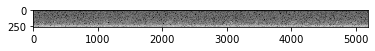

In [27]:
# Read each recording and compute spectrogram
recording_num = 0
for recording in recording_list:
    recording_num = recording_num + 1
    recording_filename = recording_dir + recording
    print('recording '+repr(recording_num)+' of '+repr(n_recordings)+': about to read '+recording)
    # Read the audio file. Don't change the sample rate.
    x, sampling_rate = librosa.load(recording_filename,sr=None)
    
    if sampling_rate != sampling_rate_expected:
        print('WRONG SAMPLING RATE: expected='+repr(sampling_rate_expected)+' recording='+repr(sampling_rate))
        break
        
    # Compute the spectrogram.
    w, t, s = signal.spectrogram(x, sampling_rate, noverlap=window_overlap, nperseg=window_size)
    
    # s: matrix with the 2D spectrogram (will be complex).
    # w: vector with the frequencies spacings of the computed DFT.
    # t: vector with the time spacings of the windows.

    # Compute the spectrum of the spectrogram.
    s_spectrum = abs(s);
    
    # Flip it vertically.
    s_spectrum = np.flip(s_spectrum, 0)

    # Compute log_10 of spectrogram.
    s_spectrum_log = np.log10( s_spectrum + np.finfo(float).eps ) #10
    plt.imshow(s_spectrum_log,cmap='gray')
    
    # Normalize so values range from 0 to 1.
    s_spectrum_log = (s_spectrum_log - np.amin(s_spectrum_log)) / (np.amax(s_spectrum_log) - np.amin(s_spectrum_log))

    # Save as png file.
    spectrogram_filename = spectrogram_dir + recording +'.png'
    plt.imsave(spectrogram_filename, s_spectrum_log, cmap='gray')

    # Save time and frequency indices.
    spectrograminfo_filename = spectrogram_dir + recording + '_info.txt'
    spectrograminfo_file = open(spectrograminfo_filename,'w')    
    for i in t:
        spectrograminfo_file.write(repr(i)+'\n')
    for i in w:
        spectrograminfo_file.write(repr(i)+'\n')
    spectrograminfo_file.close()
    